### Assignment
In this assignment students will build the random forest model after
normalizing the variable to house pricing from boston data set.

In [1]:
#Following the code to get data into the environment:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn import datasets 

In [2]:
boston = datasets.load_boston()
features = pd.DataFrame(boston.data, columns=boston.feature_names)
targets = boston.target

In [4]:
features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
X_train,X_test, y_train,y_test = train_test_split(features,targets, test_size = 0.25,random_state = 42)

In [33]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train,y_train)

In [21]:
from sklearn.ensemble import RandomForestRegressor

In [34]:
rf_reg = RandomForestRegressor(n_estimators = 100)
rf_reg.fit(scaled_X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [35]:
scaled_X_test = scaler.transform(X_test)
y_pred = rf_reg.predict(scaled_X_test)

In [36]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

r = r2_score(y_test,y_pred)
mae =mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
mae,mse,r

(2.119944881889764, 10.47336196062992, 0.8504385383425717)

In [70]:
rf_reg.score(scaled_X_test,y_test)

0.8504385383425717

In [92]:
score = []
for i in [10,20,30,40,50,60,70,80,90,100]:
    rf_reg = RandomForestRegressor(n_estimators = i)
    rf_reg.fit(scaled_X_train, y_train)
    score.append(rf_reg.score(scaled_X_test,y_test))

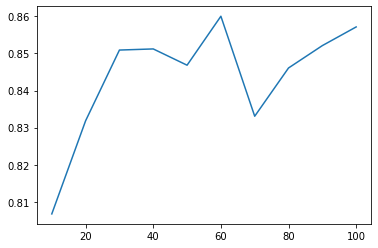

In [95]:
plt.plot([10,20,30,40,50,60,70,80,90,100],score)

In [96]:
score

[0.8067324792260567,
 0.8318446875599286,
 0.8509089498710022,
 0.8512107712643513,
 0.8468260189090827,
 0.8600238112587184,
 0.8330697220479976,
 0.8460754804995325,
 0.8521070936393971,
 0.8571412508413253]

In [99]:
from sklearn.model_selection import RandomizedSearchCV

In [196]:
grid = { "n_estimators": [10,60,80,100,120],
         "max_depth": [None,5,10,12,15,20],
         "max_features":["auto", "sqrt","log2"],
         "min_samples_split":[2,4,6,7,8,9],
         "min_samples_leaf":[1,2,3,4,5,6] }



rs_clf = RandomizedSearchCV( estimator =rf_reg, 
                             param_distributions =grid, 
                             n_iter=10, 
                             cv=5, verbose =2)

rs_clf.fit(scaled_X_train,y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=100, min_samples_split=9, min_samples_leaf=6, max_features=log2, max_depth=12 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=100, min_samples_split=9, min_samples_leaf=6, max_features=log2, max_depth=12, total=   0.3s
[CV] n_estimators=100, min_samples_split=9, min_samples_leaf=6, max_features=log2, max_depth=12 
[CV]  n_estimators=100, min_samples_split=9, min_samples_leaf=6, max_features=log2, max_depth=12, total=   0.1s
[CV] n_estimators=100, min_samples_split=9, min_samples_leaf=6, max_features=log2, max_depth=12 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=9, min_samples_leaf=6, max_features=log2, max_depth=12, total=   0.2s
[CV] n_estimators=100, min_samples_split=9, min_samples_leaf=6, max_features=log2, max_depth=12 
[CV]  n_estimators=100, min_samples_split=9, min_samples_leaf=6, max_features=log2, max_depth=12, total=   0.1s
[CV] n_estimators=100, min_samples_split=9, min_samples_leaf=6, max_features=log2, max_depth=12 
[CV]  n_estimators=100, min_samples_split=9, min_samples_leaf=6, max_features=log2, max_depth=12, total=   0.2s
[CV] n_estimators=120, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=15 
[CV]  n_estimators=120, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=15, total=   0.2s
[CV] n_estimators=120, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=15 
[CV]  n_estimators=120, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=15, total=   0.2s
[CV] n_estimators=120, min_samples_split=4, min_samp

[CV]  n_estimators=80, min_samples_split=9, min_samples_leaf=1, max_features=auto, max_depth=None, total=   0.2s
[CV] n_estimators=80, min_samples_split=9, min_samples_leaf=1, max_features=auto, max_depth=None 
[CV]  n_estimators=80, min_samples_split=9, min_samples_leaf=1, max_features=auto, max_depth=None, total=   0.2s
[CV] n_estimators=10, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=12 
[CV]  n_estimators=10, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=12, total=   0.0s
[CV] n_estimators=10, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=12 
[CV]  n_estimators=10, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=12, total=   0.0s
[CV] n_estimators=10, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=12 
[CV]  n_estimators=10, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=12, total=   0.0s
[CV] n_estimators=10, min_samples_split=4, min_samples_

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    7.3s finished


In [197]:
rs_clf.best_params_

{'n_estimators': 80,
 'min_samples_split': 9,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': None}

In [198]:
rf = RandomForestRegressor(n_estimators = 80,
                          min_samples_split = 9,
                          min_samples_leaf = 1,
                          max_features = 'auto',
                          max_depth = None)
rf.fit(scaled_X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=9, min_weight_fraction_leaf=0.0,
                      n_estimators=80, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [199]:
rf.score(scaled_X_test, y_test)

0.8513645460789936